In [1]:
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
IMG_SIZE = 48
NUM_CLASSES = 7

In [3]:
def load_fer_data(csv_file):
    data = pd.read_csv(csv_file)
    # Get pixel values and labels
    pixels = data['pixels'].tolist()
    emotions = data['emotion'].values

    # Convert pixels from string to integers and reshape to 48x48
    X = []
    for pixel_sequence in pixels:
        pixel_array = np.array([int(pixel) for pixel in pixel_sequence.split()])
        X.append(pixel_array.reshape(48, 48, 1))  # Reshape each image to 48x48x1 (grayscale)

    X = np.array(X).astype('float32')
    y = to_categorical(emotions, num_classes=7)  # One-hot encode labels

    return X, y



In [4]:
X, y = load_fer_data('fer2013.csv')
X /= 255.0  # Normalize pixel values to [0, 1]


In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
def create_cnn_model():
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 2nd Convolutional Layer
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # 3rd Convolutional Layer
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the layers
    model.add(Flatten())

    # Fully Connected Layer
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(7, activation='softmax'))  # 7 emotion classes

    return model


In [7]:
model = create_cnn_model()
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=75, batch_size=64)

# Save the trained model
model.save('emotion_detector_model.h5')


Epoch 1/75
449/449 [==============================] - 92s 201ms/step - loss: 1.7528 - accuracy: 0.2839 - val_loss: 1.6056 - val_accuracy: 0.3614
Epoch 2/75
449/449 [==============================] - 93s 206ms/step - loss: 1.5331 - accuracy: 0.4075 - val_loss: 1.4376 - val_accuracy: 0.4472
Epoch 3/75
449/449 [==============================] - 93s 206ms/step - loss: 1.4065 - accuracy: 0.4628 - val_loss: 1.3459 - val_accuracy: 0.4932
Epoch 4/75
449/449 [==============================] - 90s 199ms/step - loss: 1.3158 - accuracy: 0.4986 - val_loss: 1.2885 - val_accuracy: 0.5160
Epoch 5/75
449/449 [==============================] - 85s 190ms/step - loss: 1.2634 - accuracy: 0.5224 - val_loss: 1.2334 - val_accuracy: 0.5300
Epoch 6/75
449/449 [==============================] - 90s 201ms/step - loss: 1.2072 - accuracy: 0.5428 - val_loss: 1.1985 - val_accuracy: 0.5450
Epoch 7/75
449/449 [==============================] - 86s 191ms/step - loss: 1.1632 - accuracy: 0.5603 - val_loss: 1.1798 - val_ac

c:\Users\gopig\Desktop\emotion detector\virtualenv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


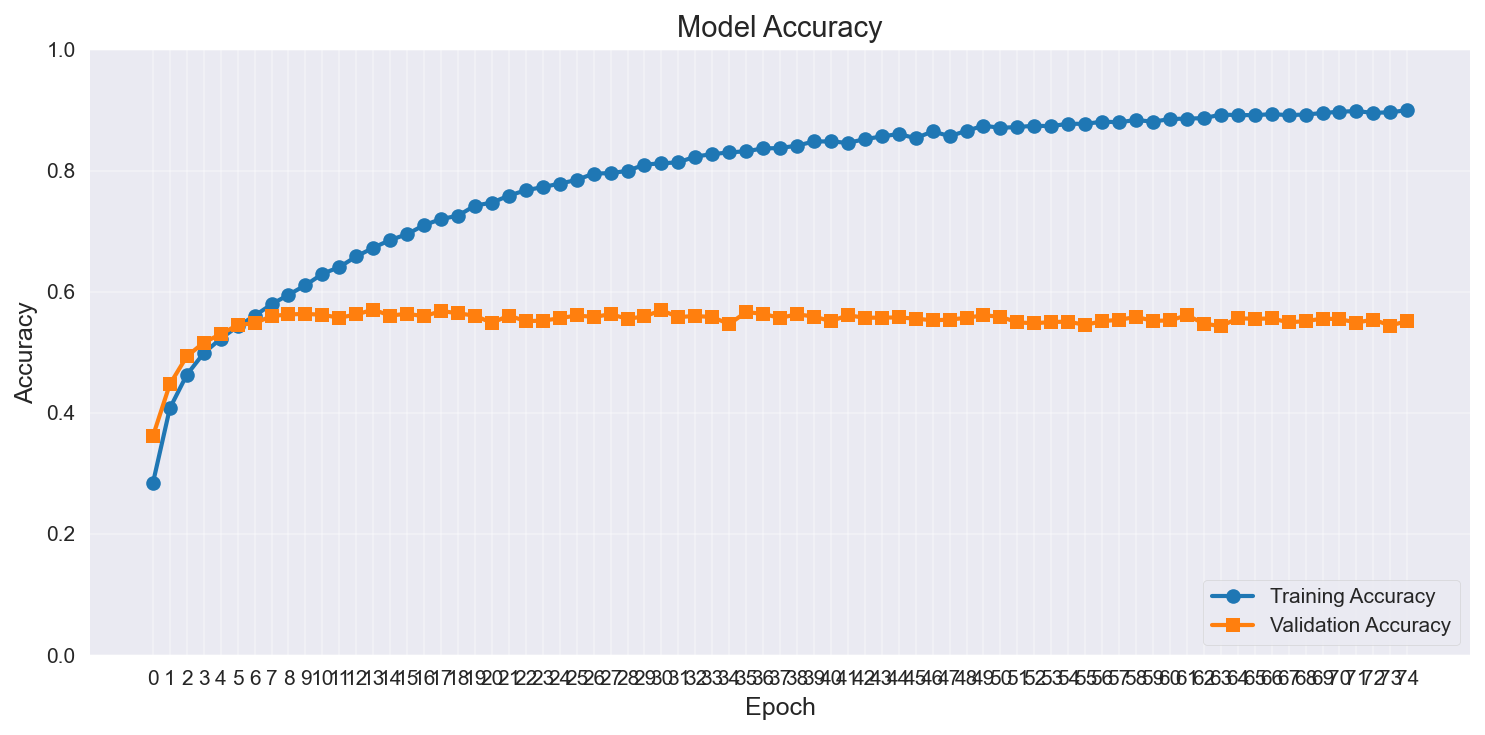

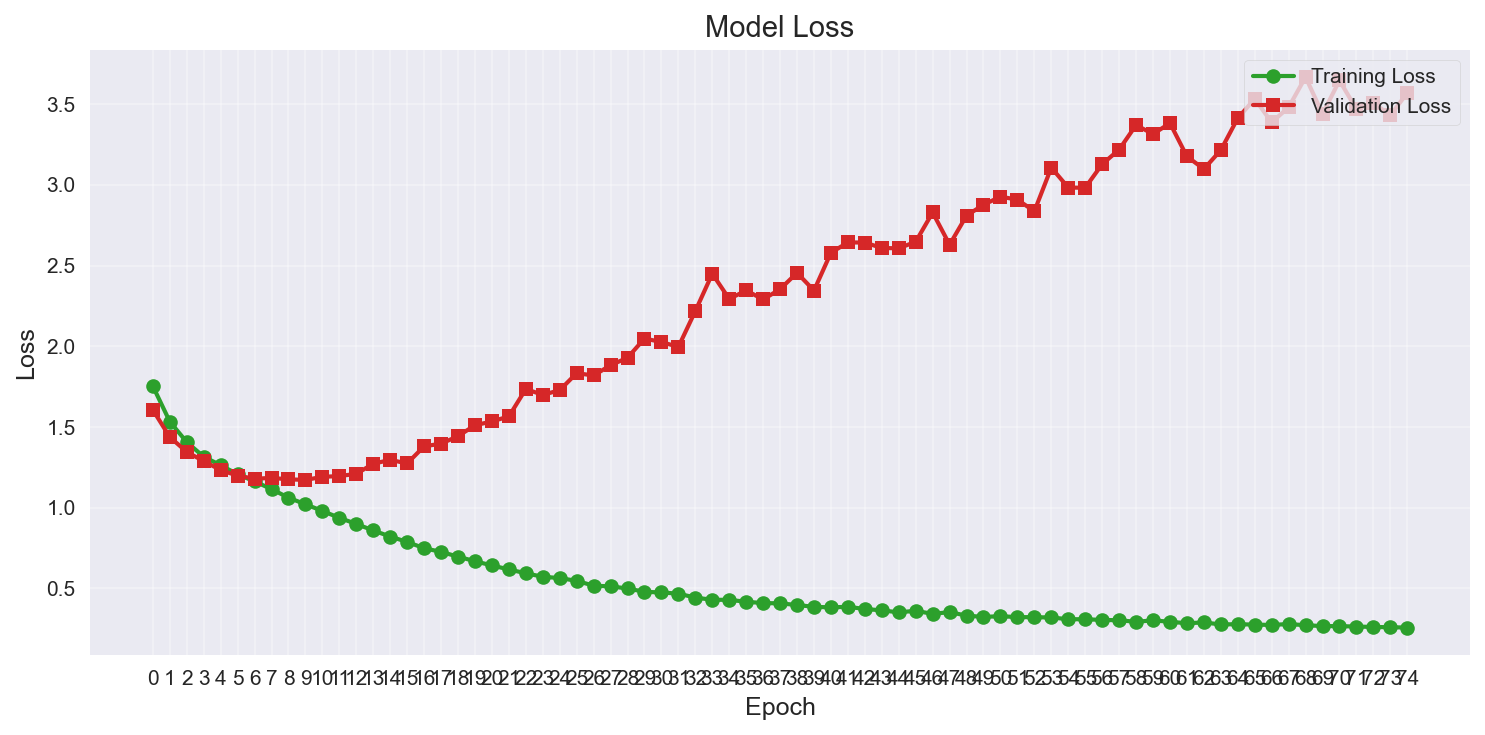

In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_training_history(history, save_path=None):
    # Set modern style parameters
    plt.style.use('seaborn-v0_8')
    mpl.rcParams['figure.dpi'] = 150
    mpl.rcParams['axes.labelsize'] = 12
    mpl.rcParams['axes.titlesize'] = 14
    mpl.rcParams['font.size'] = 10
    mpl.rcParams['lines.linewidth'] = 2
    mpl.rcParams['axes.grid'] = True

    # Create two separate figures
    fig1 = plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='#1f77b4', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#ff7f0e', marker='s')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right', frameon=True)
    plt.ylim([0, 1])
    plt.xticks(range(len(history.history['accuracy'])))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(f'{save_path}_accuracy.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(fig1)

    fig2 = plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss', color='#2ca02c', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='#d62728', marker='s')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right', frameon=True)
    plt.xticks(range(len(history.history['loss'])))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(f'{save_path}_loss.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(fig2)

# Example usage:
plot_training_history(history, save_path='training_plots')

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

113/113 [==============================] - 4s 33ms/step - loss: 3.3912 - accuracy: 0.5626
Test Accuracy: 56.26%
